In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
#%matplotlib notebook

lkg = pd.read_csv('CSV/LKG/LKG.csv')
lkg.set_index('Wavelength');

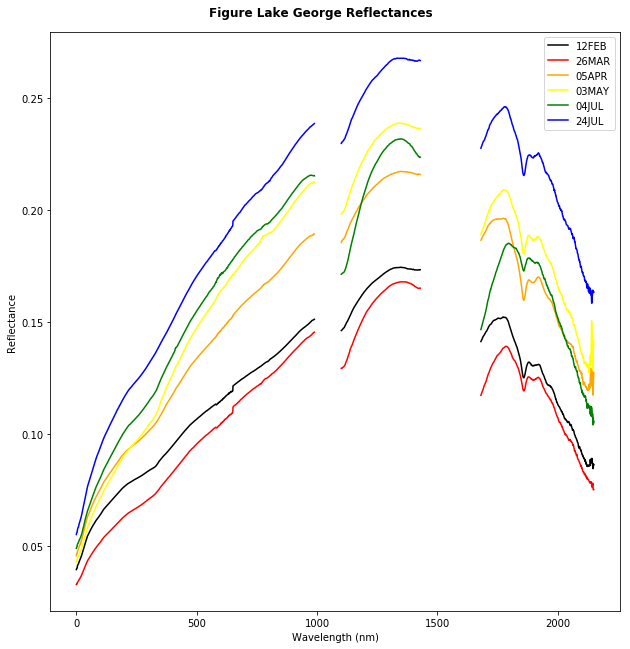

In [2]:
maska = lkg['26MAR'].where(np.logical_or(lkg.index < 1430, lkg.index > 1680))
maskb = maska.where(np.logical_or(maska.index < 990, maska.index > 1100))
masked = maskb.where(np.logical_or(maskb.index<2350, maskb.index>2500))

mask = masked.div(masked)
lkg_masked = lkg.div(mask, axis=0)

fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(9.5, 9.5))
fig.suptitle('Figure Lake George Reflectances', fontweight='bold')
axes.set_ylabel('Reflectance')
axes.set_xlabel('Wavelength (nm)')
plt.tight_layout(pad=3.5, w_pad=1.0, h_pad=1.0)
lkg_masked.plot(y=['12FEB', '26MAR', '05APR', '03MAY', '04JUL', '24JUL'], ax=axes, color=['black', 'red', 'orange', 'yellow', 'green', 'blue'])
plt.savefig('LKG-Ref.png')

In [3]:
lkg_feb = pd.read_csv('CSV/LKG-12FEB18-Sentinel2b.csv')
lkg_mar = pd.read_csv('CSV/LKG-26MAR18-Sentinel2b.csv')
lkg_apr = pd.read_csv('CSV/LKG-05APR18-Sentinel2b.csv')
lkg_may = pd.read_csv('CSV/LKG-03MAY18-Sentinel2b.csv')
lkg_jul1 = pd.read_csv('CSV/LKG-04JUL18-Sentinel2b.csv')
lkg_jul2 = pd.read_csv('CSV/LKG-24JUL18-Sentinel2b.csv')

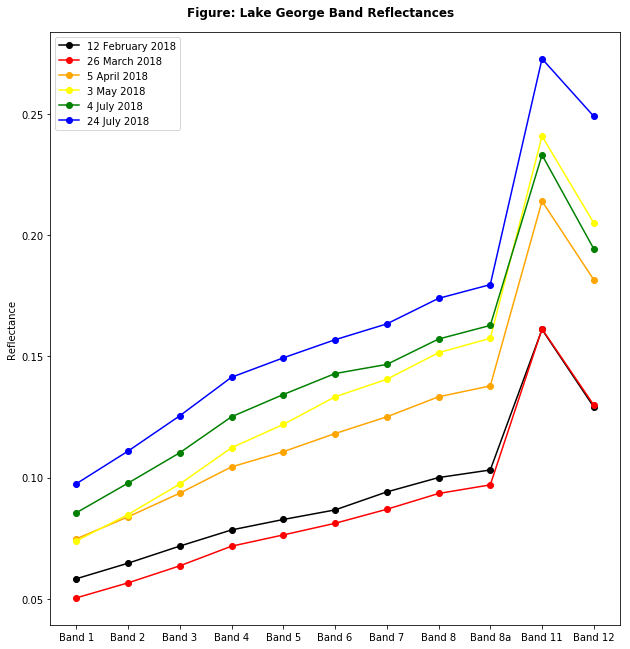

In [4]:
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(9.5, 9.5))
fig.suptitle('Figure: Lake George Band Reflectances', fontweight='bold')
axes.set_ylabel('Reflectance')
plt.tight_layout(pad=3.5, w_pad=1.0, h_pad=1.0)
axes.set_xticklabels(['Band 1','Band 2','Band 3','Band 4','Band 5','Band 6', 'Band 7', 'Band 8', 'Band 8a', 'Band 11', 'Band 12'])
axes.set_xticks([0,1,2,3,4,5,6,7,8,9,10,11])
lkg_feb.plot(y='Field_mean', style='-o', ax=axes, color='black')
lkg_mar.plot(y='Field_mean', style='-o', ax=axes, color='red')
lkg_apr.plot(y='Field_mean', style='-o', ax=axes, color='orange')
lkg_may.plot(y='Field_mean', style='-o', ax=axes, color='yellow')
lkg_jul1.plot(y='Field_mean', style='-o', ax=axes, color='green')
lkg_jul2.plot(y='Field_mean', style='-o', ax=axes, color='blue')
#plt.errorbar(x=lkg_mar.index, y=lkg_mar['Field_mean'], yerr=lkg_mar['Field_SD'], color='red', capsize=3)
#plt.errorbar(x=lkg_apr.index, y=lkg_apr['Field_mean'], yerr=lkg_apr['Field_SD'], color='orange', capsize=3)
#plt.errorbar(x=lkg_may.index, y=lkg_may['Field_mean'], yerr=lkg_may['Field_SD'], color='green', capsize=3)
#plt.errorbar(x=lkg_jul.index, y=lkg_jul['Field_mean'], yerr=lkg_jul['Field_SD'], color='blue', capsize=3)
L=plt.legend()
L.get_texts()[0].set_text('12 February 2018')
L.get_texts()[1].set_text('26 March 2018')
L.get_texts()[2].set_text('5 April 2018')
L.get_texts()[3].set_text('3 May 2018')
L.get_texts()[4].set_text('4 July 2018')
L.get_texts()[5].set_text('24 July 2018')
plt.savefig('LKG-BRef.png')